## Aim - To Identify Giants and Dwarfs stars using Absolute Magnitude and B-V Color Index 

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Shubham\Downloads\Excel\Star_classification\Starclassification.csv")
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [5]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,30.449015,1.000000


In [26]:
df['TargetClass'].value_counts()                                                #exactly equal dwarf and giant stars. 

1    19776
0    19776
Name: TargetClass, dtype: int64

In [30]:
df.isnull().sum()                                                                #no null value

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

### Feature selection 

<AxesSubplot:>

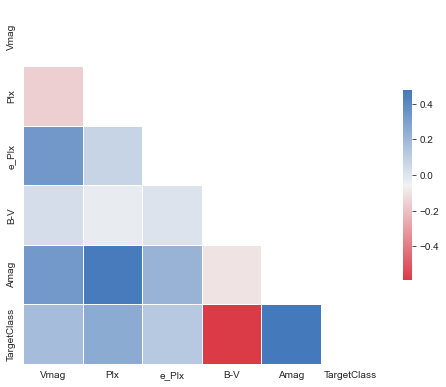

In [176]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')   
f, ax = plt.subplots(figsize=(8, 7))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#### Since, distance, standard error of distance,Spectral type has less correlation with star type, it will be dropped. 
#### Plx, Vmag is strongly correlated with Amag, as Amag is derived from vmag and Plx. Hence, vmag, Plx, e_Plx is dropped. 
#### B-V and Amag has high correlation with TargetClass. 

In [31]:
df1=df.drop(["Plx","e_Plx","SpType","Vmag"],axis=1)
df1

,B-V,Amag,TargetClass
0,1.213,22.502556,1
1,1.130,15.792525,0
2,0.596,18.797552,1
3,1.189,15.132508,0
4,0.173,13.431356,1
...,...,...,...
39547,0.474,6.982245,0
39548,0.424,18.340790,1
39549,0.227,17.159748,1
39550,1.467,15.651898,0


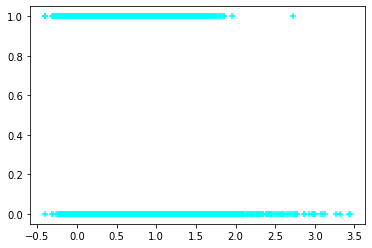

In [44]:
plt.scatter(df['B-V'],df.TargetClass,marker='+',color='cyan')

#### Higher B-V color index means Dwarf(0)

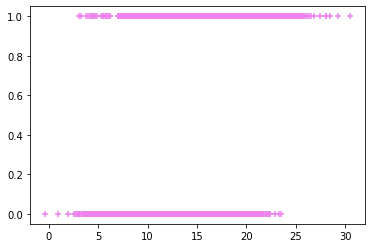

In [45]:
plt.scatter(df['Amag'],df.TargetClass,marker='+',color='violet')

#### Higher Amag(Absolute Magnitude of the Star) means Giant(1) which is correct.
#### Feature selection and analysis completed, now lets fit the model. 

### Model fit

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [75]:
X_train,X_test,y_train,y_test=train_test_split(df1[['B-V','Amag']],df1['TargetClass'],train_size=0.80) 
                                                                                         #train_test_split(X,y,trainsize)

In [76]:
model = LogisticRegression()

In [77]:
model.fit(X_train,y_train)

LogisticRegression()

In [78]:
model.score(X_test,y_test)                                           #model accuracy

0.8873720136518771

In [109]:
model.coef_                                                                       

array([[-3.838356  ,  0.69073734]])

In [108]:
model.intercept_                             

array([-8.58879235])

### Logistic Equation: Probability=1/(1+e^-(-3.8*BV+0.69*Amag-8.5))      

In [102]:
model.predict([[1.5,25]])                                 #prediction (for BV=1.5,Amag=25) is giant star

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [110]:
model.predict_proba([[1.5,25]])                                     #probability (for BV=1.5,Amag=25)

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.05107149, 0.94892851]])

In [112]:
model.predict_proba([[1.5,25]])[:,1]                               # 95% probability of giant star(1)

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.94892851])

In [104]:
model.predict([[0.8,15]])                                ##prediction(for BV=1,Amag=25) is dwarf star

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [111]:
model.predict_proba([[0.8,15]])                                # 78% probability of dwarf star(0) 

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.78556846, 0.21443154]])

#### Lets find BV decision boundary for Amag=15

In [169]:
model.predict_proba([[0.46,15]])[:,1]                       #BV=0.46 decision boundary for 50% probability for Amag=15

C:\Users\Shubham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.50165599])